In [2]:
# pyright: reportMissingImports=false

from db_utils import load_tender_records

df = load_tender_records(include_unlabelled=False)

df.head(10)

,id,title,resource_id,ca,info,published,deadline,procedure,status,pdf_url,awarddate,value,cycle,created_at,bid
0,1106,7651 CIE Board Advisory Services,4362535,Coras Iompair Eireann (CIE Utility),,2024-09-23,NaT,Qualification System,Established,,None,NaN,,2025-06-15 16:29:22.121977+00:00,0
1,2122,Provision of Vehicles Adapted for Person with ...,1791511,Brothers of Charity Services Ireland,,2023-05-26,NaT,Dynamic Purchasing System,Established,,2023-05-01,0.0,,2025-06-15 16:30:18.875498+00:00,0
2,2085,2313 - QUALIFICATION SYSTEM for Mechanical and...,1811307,An Post_391,,2023-06-07,NaT,Dynamic Purchasing System,Established,,2023-05-01,0.0,,2025-06-15 16:30:18.815448+00:00,0
3,1754,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,2568491,Health Service Executive (HSE),,2023-10-17,NaT,Dynamic Purchasing System,Established,,None,1000000.0,,2025-06-15 16:30:18.200632+00:00,0
4,1747,HSE 21712 National DPS Qualification for Opera...,2599930,Health Service Executive (HSE),,2023-10-24,NaT,Dynamic Purchasing System,Established,,None,2000000.0,,2025-06-15 16:30:18.189296+00:00,0
5,568,Single Party Framework Agreement for Advanced ...,5428296,Atlantic Technological University,,2025-05-28,2025-06-26 10:00:00,Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,None,NaN,,2025-06-15 16:28:41.111051+00:00,1
6,987,D20/CON/513 - Networks Site Investigations Qua...,4878524,Electricity Supply Board ( ESB ),,2024-12-18,NaT,Qualification System,Established,,None,NaN,,2025-06-15 16:29:02.044410+00:00,0
7,701,Painting Services,5721371,Children's Health Ireland (CHI),,2025-05-21,2025-06-27 10:00:00,Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,None,1.0,,2025-06-15 16:28:51.700458+00:00,0
8,692,M4 Westbound Bus Priority Measures - Ground In...,5722965,Kildare County Council_385,,2025-05-21,2025-06-30 15:00:00,Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,None,200000.0,,2025-06-15 16:28:51.686173+00:00,0
9,943,Single Party Framework Agreement for the provi...,5112788,The Rehab Group,,2025-02-12,2025-03-21 12:00:00,Open,Established,https://www.etenders.gov.ie/epps/cft/downloadN...,None,160000.0,,2025-06-15 16:29:01.944620+00:00,0


In [3]:
df = df.drop(columns=["published", "deadline", "awarddate", "created_at", "id"], errors="ignore")

Let's check what the info column is, as I don't even remember that

In [4]:

df["info"].notna().any() # true if at least something exists

np.True_

In [5]:
df["info"].dropna().unique()[:10]

array([''], dtype=object)

This means that the info column contains an empty string if it's not null so can also be dropped

In [6]:
df = df.drop(columns=["info"])

In [7]:
df.head(10)

,title,resource_id,ca,procedure,status,pdf_url,value,cycle,bid
0,7651 CIE Board Advisory Services,4362535,Coras Iompair Eireann (CIE Utility),Qualification System,Established,,NaN,,0
1,Provision of Vehicles Adapted for Person with ...,1791511,Brothers of Charity Services Ireland,Dynamic Purchasing System,Established,,0.0,,0
2,2313 - QUALIFICATION SYSTEM for Mechanical and...,1811307,An Post_391,Dynamic Purchasing System,Established,,0.0,,0
3,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,2568491,Health Service Executive (HSE),Dynamic Purchasing System,Established,,1000000.0,,0
4,HSE 21712 National DPS Qualification for Opera...,2599930,Health Service Executive (HSE),Dynamic Purchasing System,Established,,2000000.0,,0
5,Single Party Framework Agreement for Advanced ...,5428296,Atlantic Technological University,Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,NaN,,1
6,D20/CON/513 - Networks Site Investigations Qua...,4878524,Electricity Supply Board ( ESB ),Qualification System,Established,,NaN,,0
7,Painting Services,5721371,Children's Health Ireland (CHI),Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,1.0,,0
8,M4 Westbound Bus Priority Measures - Ground In...,5722965,Kildare County Council_385,Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,200000.0,,0
9,Single Party Framework Agreement for the provi...,5112788,The Rehab Group,Open,Established,https://www.etenders.gov.ie/epps/cft/downloadN...,160000.0,,0


let's also drop status column as that's no interest as to whether the tender could be bid on or not.

In [8]:
df = df.drop(columns=["status"])

Let's also make the same check for 'cycle' column

In [9]:
df["cycle"].dropna().unique()[:10]

array([''], dtype=object)

So that's also basically empty

In [10]:
df = df.drop(columns=["cycle"])

In [11]:
df.head(10)

,title,resource_id,ca,procedure,pdf_url,value,bid
0,7651 CIE Board Advisory Services,4362535,Coras Iompair Eireann (CIE Utility),Qualification System,,NaN,0
1,Provision of Vehicles Adapted for Person with ...,1791511,Brothers of Charity Services Ireland,Dynamic Purchasing System,,0.0,0
2,2313 - QUALIFICATION SYSTEM for Mechanical and...,1811307,An Post_391,Dynamic Purchasing System,,0.0,0
3,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,2568491,Health Service Executive (HSE),Dynamic Purchasing System,,1000000.0,0
4,HSE 21712 National DPS Qualification for Opera...,2599930,Health Service Executive (HSE),Dynamic Purchasing System,,2000000.0,0
5,Single Party Framework Agreement for Advanced ...,5428296,Atlantic Technological University,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,NaN,1
6,D20/CON/513 - Networks Site Investigations Qua...,4878524,Electricity Supply Board ( ESB ),Qualification System,,NaN,0
7,Painting Services,5721371,Children's Health Ireland (CHI),Open,https://www.etenders.gov.ie/epps/cft/downloadN...,1.0,0
8,M4 Westbound Bus Priority Measures - Ground In...,5722965,Kildare County Council_385,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,200000.0,0
9,Single Party Framework Agreement for the provi...,5112788,The Rehab Group,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,160000.0,0


All we can do with the pdf_url column at the momement is recognise whether one exists or not

In [12]:
df["has_pdf"] = df["pdf_url"].notna() & df["pdf_url"].str.strip().ne("")

However, this has turned it into true/false (boolean) so we need numeric values where 0 = false and 1 = true

In [13]:
df["has_pdf"] = df["has_pdf"].astype(int)

In [14]:
df.head(10)

,title,resource_id,ca,procedure,pdf_url,value,bid,has_pdf
0,7651 CIE Board Advisory Services,4362535,Coras Iompair Eireann (CIE Utility),Qualification System,,NaN,0,0
1,Provision of Vehicles Adapted for Person with ...,1791511,Brothers of Charity Services Ireland,Dynamic Purchasing System,,0.0,0,0
2,2313 - QUALIFICATION SYSTEM for Mechanical and...,1811307,An Post_391,Dynamic Purchasing System,,0.0,0,0
3,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,2568491,Health Service Executive (HSE),Dynamic Purchasing System,,1000000.0,0,0
4,HSE 21712 National DPS Qualification for Opera...,2599930,Health Service Executive (HSE),Dynamic Purchasing System,,2000000.0,0,0
5,Single Party Framework Agreement for Advanced ...,5428296,Atlantic Technological University,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,NaN,1,1
6,D20/CON/513 - Networks Site Investigations Qua...,4878524,Electricity Supply Board ( ESB ),Qualification System,,NaN,0,0
7,Painting Services,5721371,Children's Health Ireland (CHI),Open,https://www.etenders.gov.ie/epps/cft/downloadN...,1.0,0,1
8,M4 Westbound Bus Priority Measures - Ground In...,5722965,Kildare County Council_385,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,200000.0,0,1
9,Single Party Framework Agreement for the provi...,5112788,The Rehab Group,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,160000.0,0,1


Okay, that's 'possibly' useful but we can see that the value column is still a big mess. It contains Nan, 0 and values... 

In [15]:
df["value"].describe().astype(int)

count       1239
mean     1110858
std      1787407
min            0
25%       124000
50%       400000
75%      1000000
max      9900000
Name: value, dtype: int64

In [16]:
df["value"].isna().mean()

np.float64(0.40830945558739257)

40% of the values are missing 

In [17]:
(df["value"] == 0).mean()

np.float64(0.0673352435530086)

Certain models won't accept NaN's so we need to fill them all with 0 otherwise. However, what is this saying about the column. Zero might just mean we didn't fill this in yet. We should start by ignoring this column for training purposes because some values will be significantly out-sized (large) while other tenders may only make this information available within the PDF content or later on.

Let's try to get something without this value coming in to play first.

In [18]:
df = df.drop(columns=["value","pdf_url"])

In [19]:
df.head(10)

,title,resource_id,ca,procedure,bid,has_pdf
0,7651 CIE Board Advisory Services,4362535,Coras Iompair Eireann (CIE Utility),Qualification System,0,0
1,Provision of Vehicles Adapted for Person with ...,1791511,Brothers of Charity Services Ireland,Dynamic Purchasing System,0,0
2,2313 - QUALIFICATION SYSTEM for Mechanical and...,1811307,An Post_391,Dynamic Purchasing System,0,0
3,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,2568491,Health Service Executive (HSE),Dynamic Purchasing System,0,0
4,HSE 21712 National DPS Qualification for Opera...,2599930,Health Service Executive (HSE),Dynamic Purchasing System,0,0
5,Single Party Framework Agreement for Advanced ...,5428296,Atlantic Technological University,Open,1,1
6,D20/CON/513 - Networks Site Investigations Qua...,4878524,Electricity Supply Board ( ESB ),Qualification System,0,0
7,Painting Services,5721371,Children's Health Ireland (CHI),Open,0,1
8,M4 Westbound Bus Priority Measures - Ground In...,5722965,Kildare County Council_385,Open,0,1
9,Single Party Framework Agreement for the provi...,5112788,The Rehab Group,Open,0,1


We can also use resource_id as an index/key for traceability but we're not going to use it at all in model training

In [20]:
df = df.set_index("resource_id")

In [21]:
df.head(10)

,title,ca,procedure,bid,has_pdf
resource_id,,,,,
4362535,7651 CIE Board Advisory Services,Coras Iompair Eireann (CIE Utility),Qualification System,0,0
1791511,Provision of Vehicles Adapted for Person with ...,Brothers of Charity Services Ireland,Dynamic Purchasing System,0,0
1811307,2313 - QUALIFICATION SYSTEM for Mechanical and...,An Post_391,Dynamic Purchasing System,0,0
2568491,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,Health Service Executive (HSE),Dynamic Purchasing System,0,0
2599930,HSE 21712 National DPS Qualification for Opera...,Health Service Executive (HSE),Dynamic Purchasing System,0,0
5428296,Single Party Framework Agreement for Advanced ...,Atlantic Technological University,Open,1,1
4878524,D20/CON/513 - Networks Site Investigations Qua...,Electricity Supply Board ( ESB ),Qualification System,0,0
5721371,Painting Services,Children's Health Ireland (CHI),Open,0,1
5722965,M4 Westbound Bus Priority Measures - Ground In...,Kildare County Council_385,Open,0,1


Now we need to deal with the ca and procedure column. We don't know at this stage whether they're actually a good predictor or not but if we preprocess them then we'll be able to decide whether they have an effect or not later.


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

cat_features = ["ca", "procedure"]
num_features = ["has_pdf"]
text_feature = "title"

# hyperparameters
text_transformer = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    max_features=20_000   # tune later
)

preprocess = ColumnTransformer(
    transformers=[
        ("text", text_transformer, text_feature),  
        ("cat", OneHotEncoder(handle_unknown="ignore", min_frequency=5), cat_features),
        ("num", "passthrough", num_features),
    ],
    remainder="drop",
)


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


y = df["bid"]
X = df.drop(columns=["bid"])

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  LogisticRegression(max_iter=3000, class_weight="balanced"))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipe.fit(X_train, y_train)
print("accuracy:", pipe.score(X_test, y_test))

accuracy: 0.9164677804295943


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def cv_score(vectorizer):
    X_text = vectorizer.fit_transform(df["title"])
    return cross_val_score(LogReg, X_text, y, cv=5).mean()

LogReg = LogisticRegression(max_iter=3000, class_weight="balanced")
print("Bag-of-Words:", cv_score(CountVectorizer(stop_words="english")))
print("TF-IDF     :", cv_score(TfidfVectorizer(stop_words="english")))

Bag-of-Words: 0.939819118201231
TF-IDF     : 0.9446026652658984


In [25]:
tfidf = TfidfVectorizer(stop_words="english").fit(df["title"])
print(tfidf.get_feature_names_out()[:20])

['00' '000' '0003' '001' '002' '0027' '003' '004' '005' '006' '0062' '007'
 '009' '0091' '0094' '01' '010' '010q' '012024' '013']


In [26]:
tfidf = TfidfVectorizer(
    stop_words="english",
    token_pattern=r"(?u)\b[A-Za-z][A-Za-z]+\b",  # at least 2 letters, no digits
).fit(df["title"])

What we can do above though is ignore purely numeric tokens when building the vocabulary to vectorize

In [27]:
import numpy as np

pipe.fit(X_train, y_train)           # your full pipeline
vec  = pipe.named_steps["prep"].named_transformers_["text"]
feat = vec.get_feature_names_out()

# Logistic-regression coefficients for the text block sit at the
# beginning of the big coefficient vector:
coef = pipe.named_steps["clf"].coef_[0][: len(feat)]

top_bid    = np.argsort(coef)[-15:][::-1]   # words pushing to “bid”
top_nobid  = np.argsort(coef)[:15]          # words pushing to “no-bid”

print("Words that push the model to BID:")
for i in top_bid:
    print(f"{feat[i]:<20}  weight={coef[i]:.3f}")

print("\nWords that push the model to NO-BID:")
for i in top_nobid:
    print(f"{feat[i]:<20}  weight={coef[i]:.3f}")

Words that push the model to BID:
ict                   weight=5.151
software              weight=3.628
management            weight=3.471
solution              weight=2.866
associated            weight=2.717
support               weight=2.585
cloud                 weight=2.420
provision             weight=2.394
network               weight=2.172
ai                    weight=2.142
gpu                   weight=1.941
managed               weight=1.932
website               weight=1.873
platform              weight=1.838
information           weight=1.793

Words that push the model to NO-BID:
works                 weight=-1.495
supply                weight=-1.155
programme             weight=-0.971
sector                weight=-0.911
print                 weight=-0.875
installation          weight=-0.812
agency                weight=-0.800
electrical            weight=-0.745
recruitment           weight=-0.725
operator              weight=-0.696
hire                  weight=-0.675
deliver

Another question is how other columns, aside from the text one, impact the over-all prediction weighting

In [28]:
import numpy as np

pipe.fit(X_train, y_train)

clf_coef = pipe.named_steps["clf"].coef_[0]          # 1-D array

prep       = pipe.named_steps["prep"]
n_text     = len(prep.named_transformers_["text"].get_feature_names_out())
n_cat      = prep.named_transformers_["cat"].get_feature_names_out().shape[0]
# "num" (has_pdf) is passthrough → length = 1

# slice the big coefficient vector
i0, i1 = 0, n_text
text_coef = clf_coef[i0:i1]

i0, i1 = i1, i1 + n_cat
cat_coef  = clf_coef[i0:i1]

num_coef  = clf_coef[i1:]            # remaining 1 coefficient

print("||coef|| text :", np.linalg.norm(text_coef))
print("||coef|| cat  :", np.linalg.norm(cat_coef))
print("||coef|| num  :", np.linalg.norm(num_coef))

||coef|| text : 18.35042939826361
||coef|| cat  : 5.960336888380715
||coef|| num  : 0.0545501682312734


So this shows that there being a PDF has literally no impact/weight when it comes to making a bid/no-bid decision

In [29]:
from sklearn.metrics import accuracy_score

base_acc = accuracy_score(y_test, pipe.predict(X_test))

def block_removed(X, block_cols):
    X_copy = X.copy()
    X_copy[block_cols] = ""  # for text / cat
    if "has_pdf" in block_cols:
        X_copy["has_pdf"] = 0
    return X_copy

for block, cols in {
    "text": ["title"],
    "cat" : ["ca", "procedure"],
    "num" : ["has_pdf"]
}.items():
    acc = accuracy_score(
        y_test,
        pipe.predict(block_removed(X_test, cols))
    )
    print(f"Δ accuracy without {block}: {base_acc - acc:.3f}")

Δ accuracy without text: -0.017
Δ accuracy without cat: -0.031
Δ accuracy without num: -0.007


So this shows that it's actually the contracting authorities and procedures that have MORE weight in a bid/no-bid situation than the titles of the tenders. Let's dog into that...

In [30]:
import numpy as np
import pandas as pd

pipe.fit(X_train, y_train)

# --- grab pieces -------------------------------------------------
prep = pipe.named_steps["prep"]
clf  = pipe.named_steps["clf"]

# 1. feature names for the categorical block
cat_enc   = prep.named_transformers_["cat"]
cat_names = cat_enc.get_feature_names_out(["ca", "procedure"])   # e.g. 'ca=HSE', 'procedure=Open'

# 2. slice the coefficient vector
n_text = len(prep.named_transformers_["text"].get_feature_names_out())
start  = n_text                       # cat block starts right after the text block
stop   = start + len(cat_names)
cat_coef = clf.coef_[0][start:stop]   # 1-D array same length as cat_names

# --- inspect -----------------------------------------------------
top_n = 10

idx_pos = np.argsort(cat_coef)[-top_n:][::-1]   # largest positive weights
idx_neg = np.argsort(cat_coef)[:top_n]          # most negative weights

print("Categories pushing to BID")
print(pd.Series(cat_coef[idx_pos], index=cat_names[idx_pos]).round(3))

print("\nCategories pushing to NO-BID")
print(pd.Series(cat_coef[idx_neg], index=cat_names[idx_neg]).round(3))

Categories pushing to BID
ca_HEAnet CLG                                           2.055
ca_Cork City Council                                    1.337
ca_Enterprise Ireland                                   1.120
ca_Galway City Council                                  1.088
procedure_Negotiated with prior call for competition    0.970
ca_University College Cork                              0.953
ca_The Rehab Group                                      0.939
ca_The Office of Government Procurement                 0.921
ca_An Post_391                                          0.879
ca_Kerry Education and Training Board                   0.871
dtype: float64

Categories pushing to NO-BID
procedure_Restricted                         -1.190
ca_Electricity Supply Board ( ESB )          -0.931
ca_Munster Technological University.         -0.877
ca_Office of Public Works (OPW)              -0.867
ca_Bus Eireann/Irish Bus                     -0.728
ca_Maynooth University                       -0.6

Pretty useful, even for a quick glance at a new tender coming in!!!

Interestingly there's only 2 procedure results so let's dig into those more

In [31]:
# accuracy drop if we remove ONLY procedure
mask_no_proc = X_test.copy()
mask_no_proc["procedure"] = ""
acc_no_proc = accuracy_score(y_test, pipe.predict(mask_no_proc))

# accuracy drop if we remove ONLY ca
mask_no_ca = X_test.copy()
mask_no_ca["ca"] = ""
acc_no_ca = accuracy_score(y_test, pipe.predict(mask_no_ca))

print(f"Δ accuracy without procedure: {base_acc - acc_no_proc:.3f}")
print(f"Δ accuracy without ca       : {base_acc - acc_no_ca:.3f}")

Δ accuracy without procedure: -0.017
Δ accuracy without ca       : -0.019


So both are valuable. Since they both drop about the same amount in accuracy if you take one out...

Let's see if we can visualize some of this stuff as well

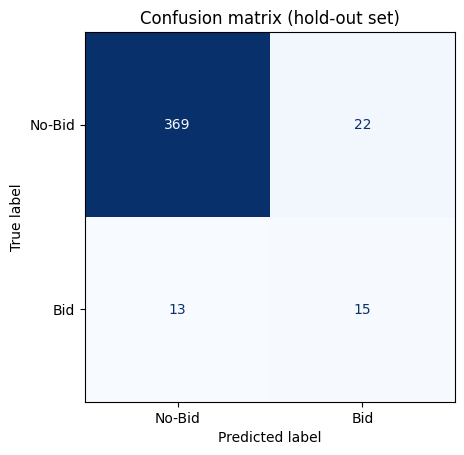

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    pipe, X_test, y_test,
    display_labels=["No-Bid", "Bid"],
    cmap="Blues", colorbar=False
)
plt.title("Confusion matrix (hold-out set)")
plt.show()

This shows that accuracy = (369 + 15) / 419 = 0.91

The model is cautious in that it missed 13 true bids but also limits false alarms to 22.

Now, the issue is that false negatives (reviewing an few extra bids) is way more costly than missing an opportunity. 

So we actually need to raise the decision threshold or some other hyper-parameter to reduce false negatives (i.e. the 13) value


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# --- data split (reuse your cleaned df) ---
y = df["bid"]
X = df.drop(columns=["bid"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- preprocess & model ---
text_transformer = TfidfVectorizer(
    stop_words="english",
    token_pattern=r"(?u)\b[A-Za-z][A-Za-z]+\b"
)
preprocess = ColumnTransformer(
    [("text", text_transformer, "title"),
     ("cat",  OneHotEncoder(handle_unknown="ignore", min_frequency=5),
              ["ca", "procedure"])],
    remainder="drop"
)
pipe = Pipeline([("prep", preprocess),
                 ("clf", LogisticRegression(max_iter=3000,
                                            class_weight="balanced"))])

pipe.fit(X_train, y_train)   # <<< makes 'pipe' real

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('text', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


/tmp/ipykernel_245585/731103850.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cat.values, y=df_cat.index,


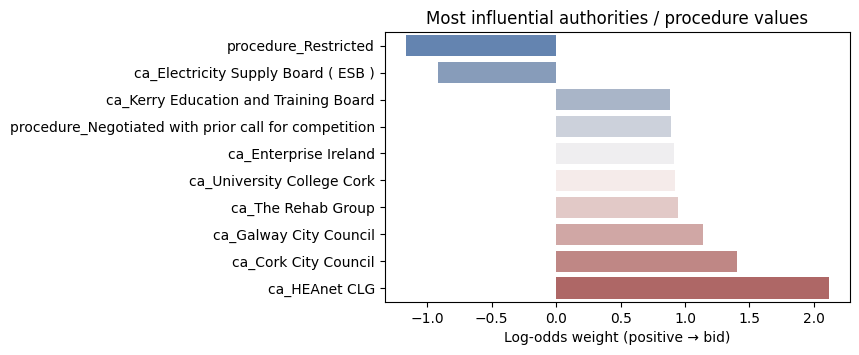

In [34]:
import pandas as pd, seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# --- make sure the model is fitted ---
pipe.fit(X_train, y_train)

# --- pull categorical feature names and their coefficients ---
prep = pipe.named_steps["prep"]
clf  = pipe.named_steps["clf"]

cat_enc   = prep.named_transformers_["cat"]
cat_names = cat_enc.get_feature_names_out(["ca", "procedure"])

n_text = len(prep.named_transformers_["text"].get_feature_names_out())
start  = n_text
stop   = start + len(cat_names)
cat_coef = clf.coef_[0][start:stop]

# --- build and plot top 10 ---
df_cat = (pd.Series(cat_coef, index=cat_names)
            .sort_values(key=abs, ascending=False)
            .head(10)
            .sort_values())            # small→large for nicer barh

plt.figure(figsize=(6,3.5))
sns.barplot(x=df_cat.values, y=df_cat.index,
            palette="vlag", orient="h")
plt.title("Most influential authorities / procedure values")
plt.xlabel("Log-odds weight (positive → bid)")
plt.ylabel("")
plt.show()

We can also get a picture of overall performance

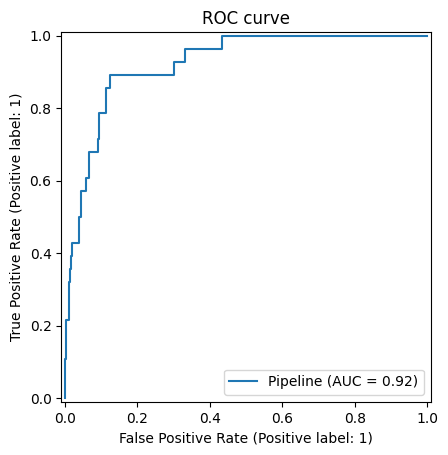

In [35]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.title("ROC curve")
plt.show()

What we can see here is that we're getting a high "true positive" rate, separates a bid from a no-bid very well.

Still, with a very low cost (relatively) to review false positives we want a HIGHER true positive rate and don't mind reviewing them as opposed to missing a multi-million pound opportunity...



Chosen threshold on training data to hit recall ≥0.9  →  0.72


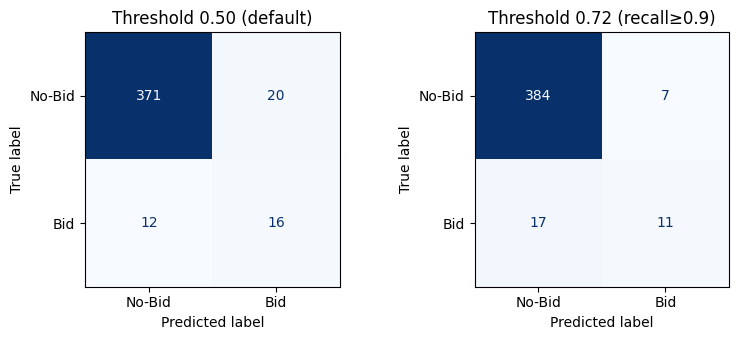

Classification report @0.72

              precision    recall  f1-score   support

      No-Bid      0.958     0.982     0.970       391
         Bid      0.611     0.393     0.478        28

    accuracy                          0.943       419
   macro avg      0.784     0.687     0.724       419
weighted avg      0.934     0.943     0.937       419



In [41]:
from sklearn.metrics import (ConfusionMatrixDisplay,
                             classification_report,
                             precision_recall_curve)
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------
# 1️⃣ decide the threshold on TRAINING data (no test leakage)
# -------------------------------------------------------------
proba_train = pipe.predict_proba(X_train)[:, 1]
prec, rec, thr = precision_recall_curve(y_train, proba_train)

target_recall = 0.90                               # ← business requirement
thr_candidates = thr[rec[:-1] >= target_recall]    # len(thr) = len(rec) - 1
best_thr = thr_candidates.max() if len(thr_candidates) else 0.50
print(f"Chosen threshold on training data to hit "
      f"recall ≥{target_recall}  →  {best_thr:.2f}")

# -------------------------------------------------------------
# 2️⃣ evaluate on the untouched TEST set
# -------------------------------------------------------------
proba_test  = pipe.predict_proba(X_test)[:, 1]
y_pred_50   = pipe.predict(X_test)                    # default 0.50
y_pred_best = (proba_test >= best_thr).astype(int)    # chosen thr

# -------------------------------------------------------------
# 3️⃣ side-by-side confusion matrices
# -------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))
for ax, yhat, title in zip(
        axes,
        [y_pred_50, y_pred_best],
        [f"Threshold 0.50 (default)",
         f"Threshold {best_thr:.2f} (recall≥{target_recall})"]):
    ConfusionMatrixDisplay.from_predictions(
        y_test, yhat, display_labels=["No-Bid", "Bid"],
        cmap="Blues", colorbar=False, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

print(f"Classification report @{best_thr:.2f}\n")
print(classification_report(y_test, y_pred_best,
                            target_names=["No-Bid", "Bid"], digits=3))


=== threshold = 0.72 ===


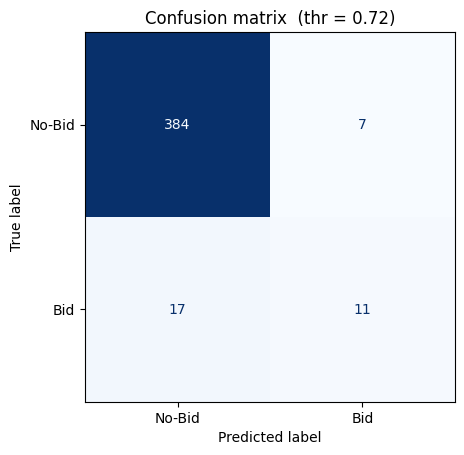

              precision    recall  f1-score   support

      No-Bid      0.958     0.982     0.970       391
         Bid      0.611     0.393     0.478        28

    accuracy                          0.943       419
   macro avg      0.784     0.687     0.724       419
weighted avg      0.934     0.943     0.937       419


=== threshold = 0.60 ===


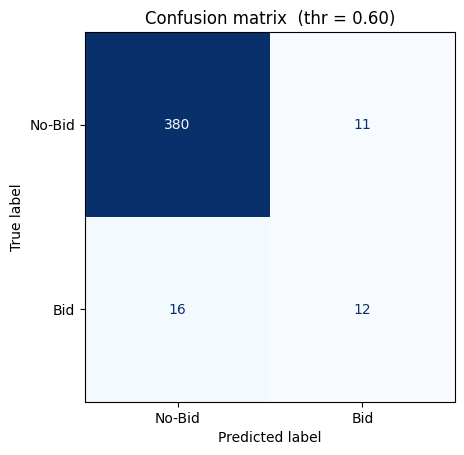

              precision    recall  f1-score   support

      No-Bid      0.960     0.972     0.966       391
         Bid      0.522     0.429     0.471        28

    accuracy                          0.936       419
   macro avg      0.741     0.700     0.718       419
weighted avg      0.930     0.936     0.933       419


=== threshold = 0.50 ===


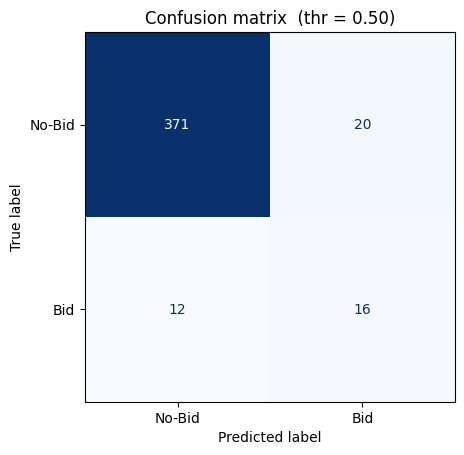

              precision    recall  f1-score   support

      No-Bid      0.969     0.949     0.959       391
         Bid      0.444     0.571     0.500        28

    accuracy                          0.924       419
   macro avg      0.707     0.760     0.729       419
weighted avg      0.934     0.924     0.928       419


=== threshold = 0.40 ===


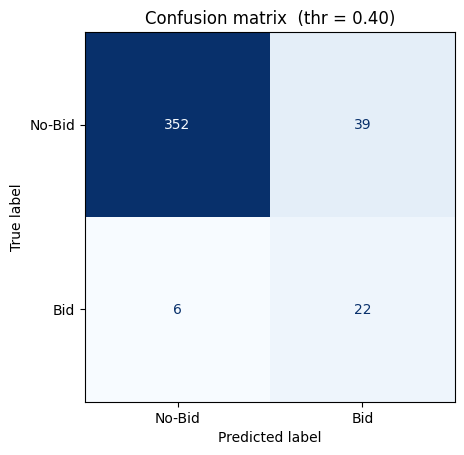

              precision    recall  f1-score   support

      No-Bid      0.983     0.900     0.940       391
         Bid      0.361     0.786     0.494        28

    accuracy                          0.893       419
   macro avg      0.672     0.843     0.717       419
weighted avg      0.942     0.893     0.910       419


=== threshold = 0.30 ===


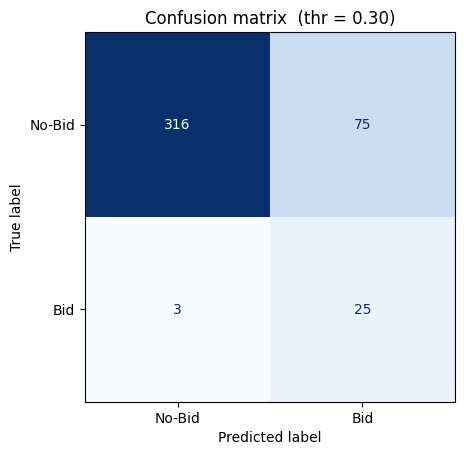

              precision    recall  f1-score   support

      No-Bid      0.991     0.808     0.890       391
         Bid      0.250     0.893     0.391        28

    accuracy                          0.814       419
   macro avg      0.620     0.851     0.640       419
weighted avg      0.941     0.814     0.857       419


=== threshold = 0.20 ===


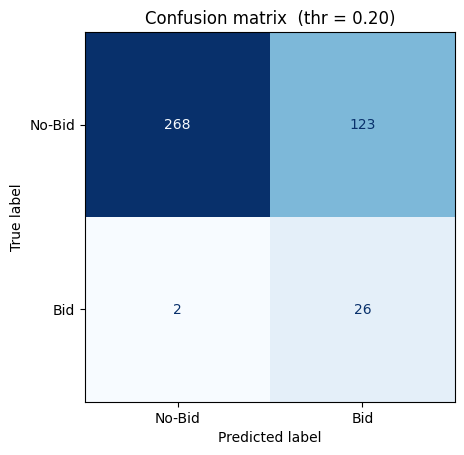

              precision    recall  f1-score   support

      No-Bid      0.993     0.685     0.811       391
         Bid      0.174     0.929     0.294        28

    accuracy                          0.702       419
   macro avg      0.584     0.807     0.552       419
weighted avg      0.938     0.702     0.776       419


=== threshold = 0.10 ===


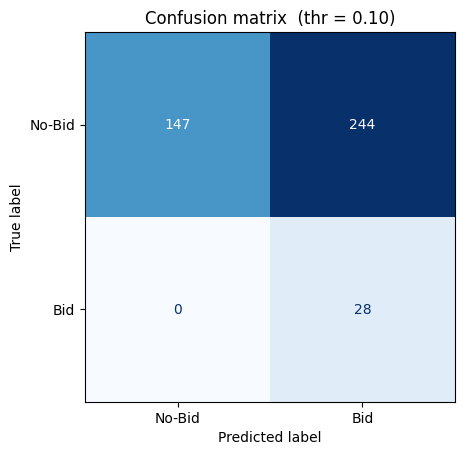

              precision    recall  f1-score   support

      No-Bid      1.000     0.376     0.546       391
         Bid      0.103     1.000     0.187        28

    accuracy                          0.418       419
   macro avg      0.551     0.688     0.367       419
weighted avg      0.940     0.418     0.522       419



In [42]:
# --- try several thresholds *on the test set* --------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
)

proba_test = pipe.predict_proba(X_test)[:, 1]    # P(bid) on the hold-out set
thresholds = [0.72, 0.60, 0.50, 0.40, 0.30, 0.20, 0.10]

for thr in thresholds:
    y_pred = (proba_test >= thr).astype(int)

    print(f"\n=== threshold = {thr:.2f} ===")
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=["No-Bid", "Bid"],
        cmap="Blues",
        colorbar=False,
    )
    plt.title(f"Confusion matrix  (thr = {thr:.2f})")
    plt.show()

    print(
        classification_report(
            y_test, y_pred, target_names=["No-Bid", "Bid"], digits=3
        )
    )

Since the financial penalty for missing bids ('cause they're not flagged) is potentially so huge we can afford to lower the threshold to 30% which is the probability cut-off to turn the models bid-probability into a hard Yes/No decision

The model gives any tender a probability then we decide if that >= the threshold we'll include it as a tender for review, otherwise it's classified as a no-bid

This now has increased the precision of the model so that when it says "no-bid" it's correct 99% of the time. This has introduced more false positives i.e. tenders needing review BUT that's acceptable. We now catch nearly 90% of bid opportunities 'cause we've lowered the burden of proof.

While this reduces accuracy down to 81% from a business point-of-view this trade-off is entirely acceptable. 

At the old threshold of 0.50 we missed 46% or real bids BUT reducing the threshold means we potentially only miss 11% of real bids which is a huge gain.

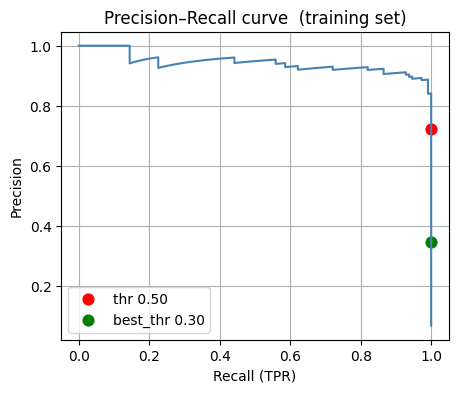

In [44]:
# ---------------------------------------------------------------
#  Precision–Recall curve *on the TRAINING data*  (no leakage)
# ---------------------------------------------------------------
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import numpy as np

proba_train = pipe.predict_proba(X_train)[:, 1]      # P(bid) on TRAIN
precision, recall, thresh = precision_recall_curve(y_train, proba_train)

plt.figure(figsize=(5, 4))
plt.plot(recall, precision, color="steelblue")
plt.xlabel("Recall (TPR)")
plt.ylabel("Precision")
plt.title("Precision–Recall curve  (training set)")

# ---------------------------------------------------------------
# Mark two thresholds:
#   1️⃣  default 0.50 for reference
#   2️⃣  your chosen best_thr (computed from training data)
# ---------------------------------------------------------------
def mark(th, label, color):
    idx = np.flatnonzero(thresh >= th)[0]        # matching point on the curve
    plt.scatter(recall[idx], precision[idx], c=color, s=60, label=label)

best_thr = 0.30

mark(0.50,  "thr 0.50",          "red")
mark(best_thr, f"best_thr {best_thr:.2f}", "green")

plt.legend()
plt.grid(True)
plt.show()

In [45]:
for t in [0.50, 0.40, 0.30]:
    y_pred = (proba >= t).astype(int)
    tp = ((y_test==1) & (y_pred==1)).sum()
    fp = ((y_test==0) & (y_pred==1)).sum()
    fn = ((y_test==1) & (y_pred==0)).sum()
    prec = tp / (tp+fp) if tp+fp else 0
    rec  = tp / (tp+fn) if tp+fn else 0
    print(f"Threshold {t:4.2f}:  precision={prec:.3f}  recall={rec:.3f}  FP={fp}")

Threshold 0.50:  precision=0.444  recall=0.571  FP=20
Threshold 0.40:  precision=0.361  recall=0.786  FP=39
Threshold 0.30:  precision=0.250  recall=0.893  FP=75


If we plot a precision recall curve we can see that higher precision (or true-positive rate - where the model says 'bid' how often is it right) means lower recall where we're going to miss some positives...

If we lower the precision by modifying the threshold (to classify something as a bid opportunity) we massively increase recall so we aren't going to miss nearly as many 'real' bids but at the cost of a higher false positive rate. 

Since (as previously stated) there's a huge cost to missing an opportunity then this is a solid trade-off from a business perspective.

A hugely accurate model isn't necessarily the goal, we're still filtering out a huge amount of work for someone in the sales team having to spend their time on nonsense by removing many utterly irrelevant tenders to wade through.

Using the test set (419 records) as an example without this model someone would have to review 419 titles, with the model they'd read the 25 bids and 75 false positives, which still cuts the review workload by 75% or in other words reading 1 in 4

Say there's 50 tenders created a day, they're now only needing to pay attention to 12 of them

Now, that's all well and good but we still could do with making sure we're not dealing with too many dimensions or some such


In [46]:
# After you've done: pipe.fit(X_train, y_train)
Xt = pipe.named_steps["prep"].transform(X_train)   # sparse matrix
print("Transformed shape:", Xt.shape)

Transformed shape: (1675, 3195)


In [47]:
prep = pipe.named_steps["prep"]

n_text = len(prep.named_transformers_["text"].get_feature_names_out())
n_cat  = len(prep.named_transformers_["cat"].get_feature_names_out())
n_num  = Xt.shape[1] - n_text - n_cat        # passthrough numerics

print(f"Text features      : {n_text}")
print(f"Categorical (1-hot): {n_cat}")
print(f"Numeric            : {n_num}")
print(f"TOTAL              : {Xt.shape[1]}")

Text features      : 3098
Categorical (1-hot): 97
Numeric            : 0
TOTAL              : 3195


We've managed to hit a pretty reasonable number of text features which would overwhelm a simple Decision Tree Classifier, we could heavily limit the depth or switch to an ensemble model but there are still better options. Remember, we're effectively only looking at the 'title' of the tender.